### using real time data using Horse and humans


In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-06-08 06:52:27--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   119MB/s    in 1.2s    

2020-06-08 06:52:29 (119 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import zipfile

In [2]:
zip_file=zipfile.ZipFile('/tmp/horse-or-human.zip')
zip_file.extractall('/tmp/horse_humans')
zip_file.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/tmp/horse-or-human.zip' mode='r'>>

In [3]:
path=os.path.join('/tmp/horse_humans')

In [4]:
train_path=path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
image_gen=ImageDataGenerator(rescale=1/255.0,rotation_range=40,
                             width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,
                            zoom_range=0.2,fill_mode='nearest',horizontal_flip=True)
train_gen=image_gen.flow_from_directory(train_path,target_size=(200,200),batch_size=20,shuffle=True,
                                       class_mode='binary')

Found 1027 images belonging to 2 classes.


In [6]:
from tensorflow.keras.layers import Dense,Flatten,Dropout,MaxPooling2D,Conv2D

In [7]:
model=keras.Sequential()
model.add(Conv2D(filters=32,kernel_size=(2,2),strides=(1,1),padding='VALID',
                 input_shape=(200,200,3),activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(2,2),strides=(1,1),padding='VALID',
                 activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(units=128,activation=tf.nn.relu))
model.add(Dense(units=1))
adam=keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam,loss=keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 199, 199, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 153664)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [8]:
model.fit(train_gen,steps_per_epoch=50,epochs=5)

  ...
    to  
  ['...']
Train for 50 steps
Epoch 1/5
50/50 [==============================] - 33s 653ms/step - loss: 0.6998 - accuracy: 0.5147
Epoch 2/5
50/50 [==============================] - 32s 638ms/step - loss: 0.6062 - accuracy: 0.6565
Epoch 3/5
50/50 [==============================] - 32s 637ms/step - loss: 0.5567 - accuracy: 0.7240
Epoch 4/5
50/50 [==============================] - 32s 641ms/step - loss: 0.5103 - accuracy: 0.7376
Epoch 5/5
50/50 [==============================] - 31s 627ms/step - loss: 0.5024 - accuracy: 0.7437


### visualize data

In [9]:
layers=model.layers
layers

In [10]:
layers_output=[layer.output for layer in layers]
layers_output

[<tf.Tensor 'conv2d/Identity:0' shape=(None, 199, 199, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d/Identity:0' shape=(None, 99, 99, 32) dtype=float32>,
 <tf.Tensor 'conv2d_1/Identity:0' shape=(None, 98, 98, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/Identity:0' shape=(None, 49, 49, 64) dtype=float32>,
 <tf.Tensor 'dropout/Identity:0' shape=(None, 49, 49, 64) dtype=float32>,
 <tf.Tensor 'flatten/Identity:0' shape=(None, 153664) dtype=float32>,
 <tf.Tensor 'dense/Identity:0' shape=(None, 128) dtype=float32>,
 <tf.Tensor 'dense_1/Identity:0' shape=(None, 1) dtype=float32>]

In [11]:
activation=keras.models.Model(inputs=model.input,outputs=layers_output)

In [12]:
os.listdir(os.path.join(train_path,'horses'))[3]

'horse28-9.png'

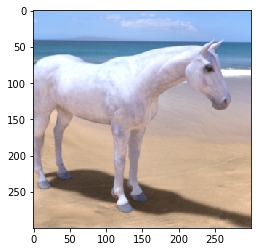

In [13]:
sample_image=plt.imread(os.path.join(train_path,'horses/horse28-9.png'))
plt.imshow(sample_image)

In [18]:
from PIL import Image
image=Image.open(os.path.join(train_path,'horses/horse28-9.png'))
predict_image=image.resize((200,200))

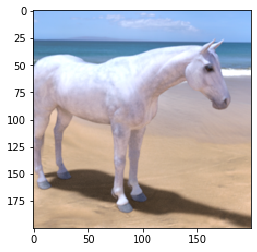

In [19]:
plt.imshow(predict_image)

In [23]:
predict_image=np.asarray(predict_image)

In [25]:
predict_image=predict_image[:,:,:3]

In [26]:
predict_image=np.reshape(predict_image,(-1,200,200,3))

In [28]:
result=activation.predict(predict_image)

In [32]:
result[2].shape

(1, 98, 98, 64)

In [34]:
plt.imshow(result[:,:,:,2])

TypeError: list indices must be integers or slices, not tuple

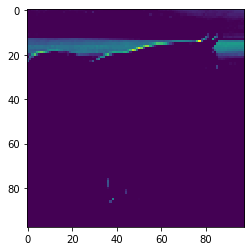

In [40]:
visualize=result[2].reshape(98,98,64)
plt.imshow(visualize[:,:,20])

In [42]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-06-08 07:15:43--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  88.1MB/s    in 1.0s    

2020-06-08 07:15:44 (88.1 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [41]:
### Transfer learning
from tensorflow.keras.applications import InceptionV3

In [43]:
pre_trained_model=InceptionV3(input_shape=(200,200,3),weights=None,include_top=False)

In [44]:
pre_trained_model.load_weights('/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [46]:
for layers in pre_trained_model.layers:
    layers.trainable=False

In [47]:
final_layer=pre_trained_model.get_layer('mixed6')
output_layer_op=final_layer.output

In [48]:
output_layer_op

<tf.Tensor 'mixed6/Identity:0' shape=(None, 10, 10, 768) dtype=float32>

In [49]:
x=Flatten()(output_layer_op)
x=Dense(128,activation='relu')(x)
x=Dense(2,activation='relu')(x)

model=keras.models.Model(inputs=pre_trained_model.input, outputs=x)


In [52]:
model.compile(optimizer='adam',loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 99, 99, 32)   96          conv2d_2[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 99, 99, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [53]:
model.fit(train_gen,epochs=5,steps_per_epoch=50)

  ...
    to  
  ['...']
Train for 50 steps
Epoch 1/5
50/50 [==============================] - 57s 1s/step - loss: 7.6006 - accuracy: 0.5015
Epoch 2/5
50/50 [==============================] - 53s 1s/step - loss: 7.6697 - accuracy: 0.5000
Epoch 3/5
50/50 [==============================] - 54s 1s/step - loss: 7.6697 - accuracy: 0.5000
Epoch 4/5
50/50 [==============================] - 53s 1s/step - loss: 7.6694 - accuracy: 0.5000
Epoch 5/5
50/50 [==============================] - 54s 1s/step - loss: 7.6694 - accuracy: 0.5000
